<img src="raw\profile_manoelgadi.png" width=100 height=100 align="right">

Author: Manoel Gadi

Last revision: 19/July/2020

---

Welcome to the GROUP VIDEO starter code.

Your group task is to record a video of 10 - 15 minutes CLEANING DATA and DEVELOPING 2 MODELS using the RBA_KYC_Accounts_ALL_Ids.xlsx dataset. You should use Pandas, Matplotlib and Scikit Learn (Sklearn) libraries only if possible. Your video should include:

* A quick explanation of Pandas, Matplotlib and Sklearn, specially including their histories. (less than a minute)
* A quick Exploratory Data Analysis of the data set used.
* Using the EDA, explain the problems of data quality in this data set.
* Research about data preparation with Python. Propose and implement ways to clean, input missing and prepare the data for modelling. (YOUR VIDEO SHOULD FOCUS IN THIS PART - 70-80% OF THE VIDEO SHOULD BE ABOUT DATA CLEANING AND DATA PREPARATION)
* Then, develop one Regression model using rbaValue as target variable.  Remember to assess the model performance using an appropriate measure for regression. 
* Then, develop one binary Classification model using Risk_Description setting Risk_Description = Low as 0 and else 1 (Medium or High). Remember to assess your model performance using a appropriate measure for classification.

ps. please, don't improve the model, you don't need to make good one, simply do a quick one! This exercise is about explaining, in a video lecture, how to prepare the data for modelling , not about making a good model .

ps. You can apply any of the steps in the model development seing in the last class, but be coincious of time it may take to do it all, so avoid overcomplicating things.

Please find below couple videos from previous years (different data set and different objective) and from which you'll also learn some Python ideas:

* 2018 MBD01 Group E Variable Transformation - https://www.youtube.com/watch?v=j_0HQ2UF_L0
* 2019 - Risk & Fraud Analytics - Scikit Learn & Lending Club - Group C - https://www.youtube.com/watch?v=oTmHMXsksM8

---

### Importing the database: RBA_KYC_Accounts_ALL_Ids.xlsx

In [5]:
import pandas as pd

In [6]:
# df = pd.read_excel('raw\RBA_KYC_Accounts_ALL_Ids.xlsx')

# For speed, we store the Excel file in a Pickle
# https://stackoverflow.com/a/17098736/3780957
# df.to_pickle('storage\RBA_KYC_Accounts_ALL_Ids.pkl')

In [7]:
df = pd.read_pickle('storage\RBA_KYC_Accounts_ALL_Ids.pkl')

In [8]:
df['Risk_Description'] = df['rba_grade_desc']
df.drop(['rba_grade_desc'], axis = 1, inplace = True) 

## Checking some quick statistics

In [9]:
df.describe()

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,birthCountry,profession,companyType,lastUpdate,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868.000000,224868.000000,220153.000000,0.0,79748.000000,114574.000000,0.0,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,0.0,224868.000000
mean,1.0,448.451323,4.394503e+16,1.114418,1.021221,41.310575,NaN,18.309487,49.857577,NaN,...,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,17.624194
std,0.0,228.193308,2.349321e+16,0.318319,0.144122,16.000536,NaN,6.586481,6.736115,NaN,...,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,8.368345
min,1.0,201.000000,2.020028e+09,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,1.000000,1.000000,31.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,1.000000,1.000000,41.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,1.000000,1.000000,52.000000,NaN,21.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,21.330000
max,1.0,805.000000,8.052929e+16,2.000000,2.000000,119.000000,NaN,39.000000,100.000000,NaN,...,1267.000000,0.000000e+00,3292.000000,5.867291e+05,78.000000,8.394000e+06,2858.000000,9.942530e+06,NaN,100.000000


## Creating the variable creationDate_indays

In [10]:
df['creationDate_indays'] = df['creationDate'].astype('datetime64[ns]').max()-df['creationDate'].astype('datetime64[ns]') 
df['creationDate_indays'].head()

0   1295 days
1   1860 days
2   1860 days
3   1860 days
4   1860 days
Name: creationDate_indays, dtype: timedelta64[ns]

## Creating the variable date of birth

In [11]:
def f(end):
    global max_date
    try:
        r = relativedelta(max_date, end) 
        return(r.years)
    except:
        return(0)
#    r = relativedelta(pd.to_datetime('now'), end) 
#    return '{} years {} days'.format(r.years, r.days)

In [12]:
max_date = df['dateOfBirth'].astype('datetime64[ns]').max()
df['age'] = df['dateOfBirth'].astype('datetime64[ns]').apply(f)
df['age'].head()

0    0
1    0
2    0
3    0
4    0
Name: age, dtype: int64

## Checking for percentage (%) of missing values

In [13]:
100*df.isnull().sum()/df.isnull().count()

org_code                        0.000000
branchCode                      0.000000
customerId                      0.000000
fullaccount                     0.000000
customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265044
nationalityOriginal             1.529342
extraNationality               99.202643
dateOfBirth                     2.096786
age_in_year                     2.096786
birthCountry                  100.000000
birthPlace                      9.713254
profession                     64.535639
companyType                    49.048331
giinCode                       99.994664
lastUpdate                    100.000000
status                          0.000000
ledgerCode                      0.000000
accountCurrency                 0.000000
jointAccount                    0.000000
IsBlackListed                   0.000000
CUS_CLASS       

## Making some histograms

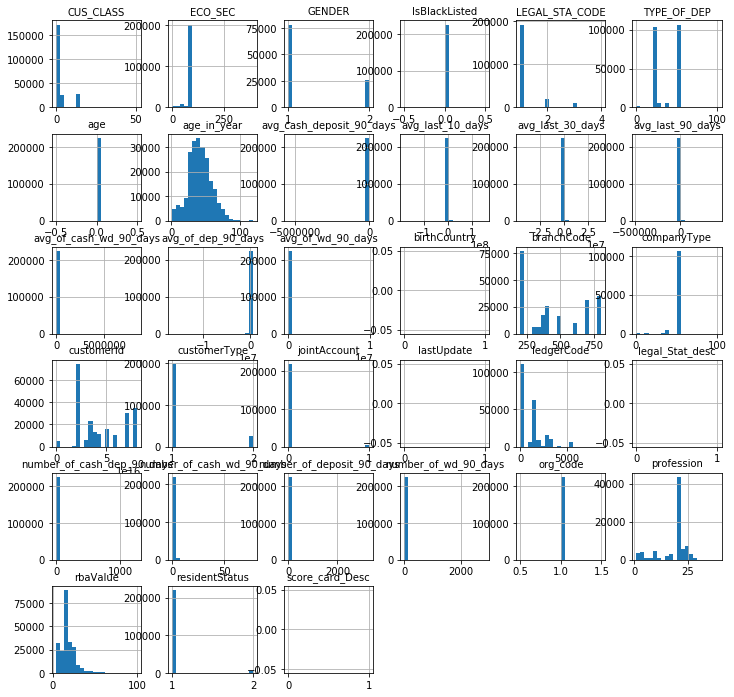

In [14]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

### Now, is your group turn: 
...

---